# Python Training
Chapter 1 ~ 9

#### The commands you will be using most of the time in command mode
* h - Bring up help (ESC to dismiss)
* a - Create cell above
* b - Create cell below
* x - Cut cell
* c - Copy cell
* v - Paste cell below
* Enter - Go into Edit Mode
* m - Change cell type to Markdown
* y - Change cell type to code
* ii - Interrupt kernel
* 00 - Restart kernel
* Ctr-Enter - Execute cell
* Ctr-Enter - Run cell (execute Python code, render Markdown)
* ESC - Go back to command mode
* TAB - Tab completion
* Shift-TAB - Bring up tooltip (ESC to dismiss

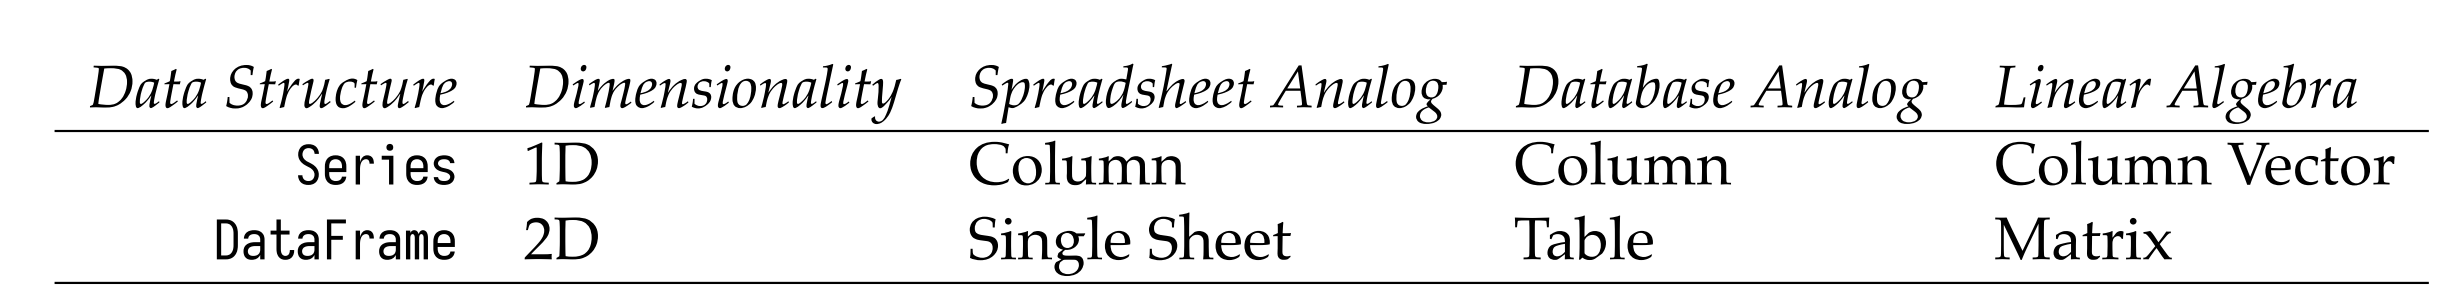


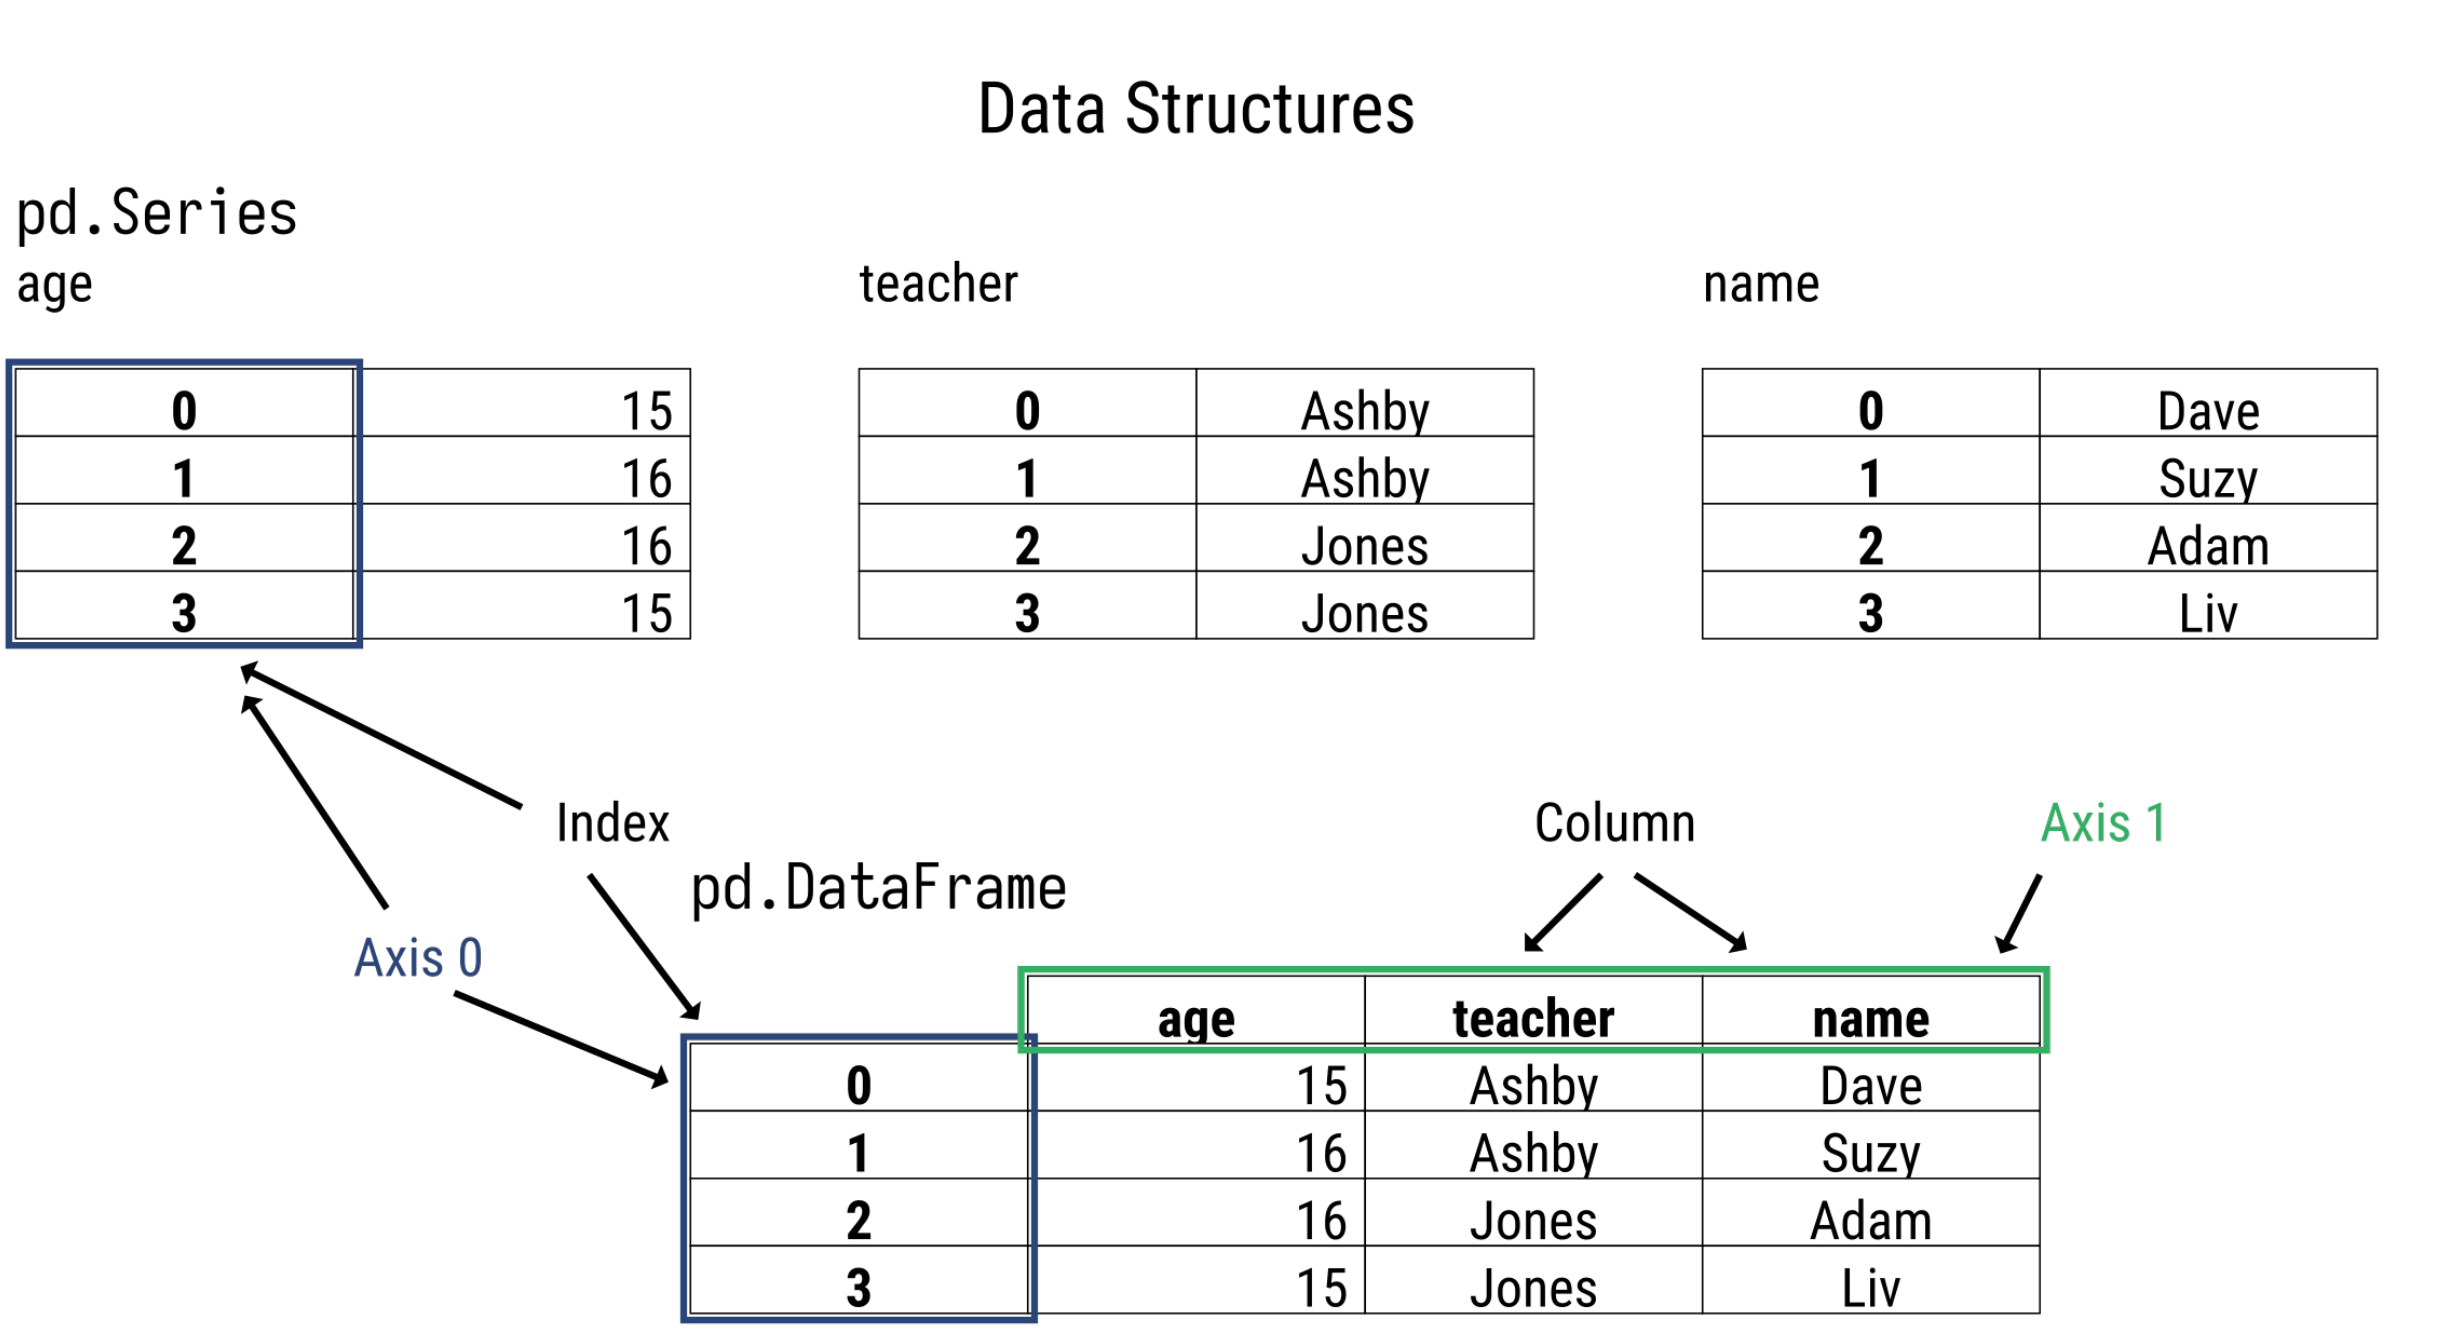

## `Intorduction`

In [ ]:
# Print version
import pandas as pd
print (pandas.__version__)

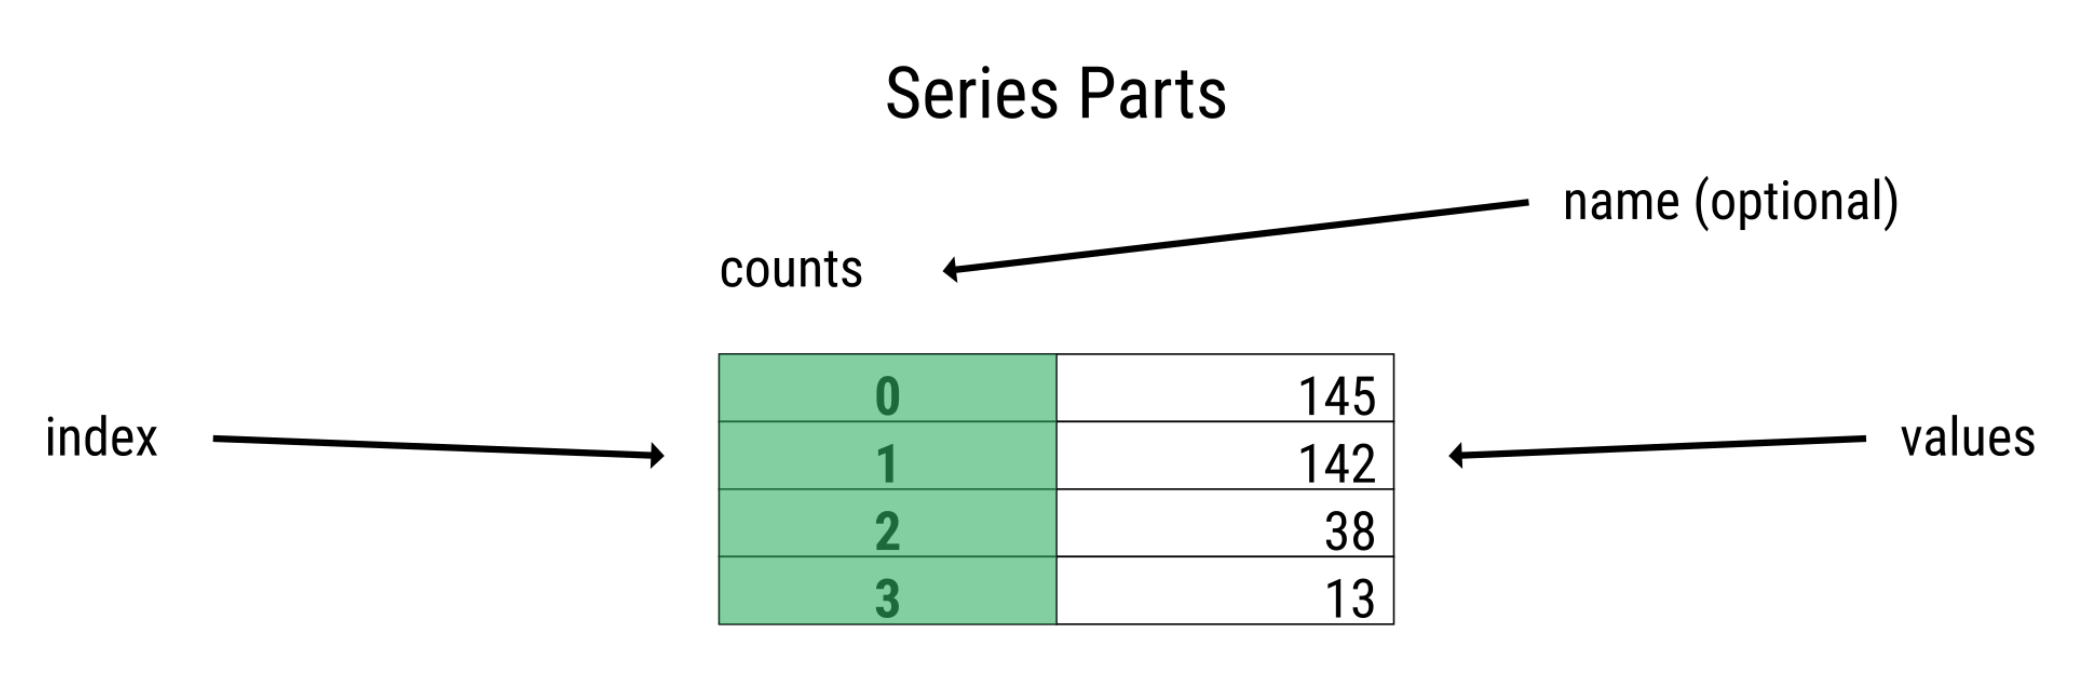

In [ ]:
#Define Series
age=pd.Series([15,16,16,15],name='ages')
teacher=pd.Series(['Ashby','Ashby','Jones','Jones'],name='teachers')
name=pd.Series(['Dave','Suzy','Adam','Liv'],name='names')

In [ ]:
name

In [ ]:
# print table
teacher

In [ ]:
# print all values
teacher.values

In [ ]:
# print inxed
teacher.index

In [ ]:
# print specific value
teacher[0]

In [ ]:
# dealing with nan "not a number" values
import numpy as np
nan_series1=pd.Series([50,np.nan],name='nan_series1')

In [ ]:
nan_series1

In [ ]:
#befeit of NAN values is to ignore the cell in calculation
#count method
nan_series1.count()

In [ ]:
#size property
nan_series1.size

In [ ]:
nan_series2=pd.Series([15,None],name='n')

In [ ]:
nan_series2

In [ ]:
nan_series2.index

In [ ]:
nan_series2.values

In [ ]:
nan_series2.size

In [ ]:
nan_series2.count()

# `Loading Data`

In [ ]:
# load File
url='https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
data_frame=pd.read_csv(url)

In [ ]:
data_frame.head()

In [ ]:
# call specific column
city_mpg=data_frame.city08
highway_mpg=data_frame.highway08

In [ ]:
city_mpg

In [ ]:
# Series Attributes
# in order to know the total number of attributes of specific serie
dir(city_mpg)

In [ ]:
len(dir(city_mpg))

# `Operators (& Dunder Methods)`

#### Operations - Index Alignment 

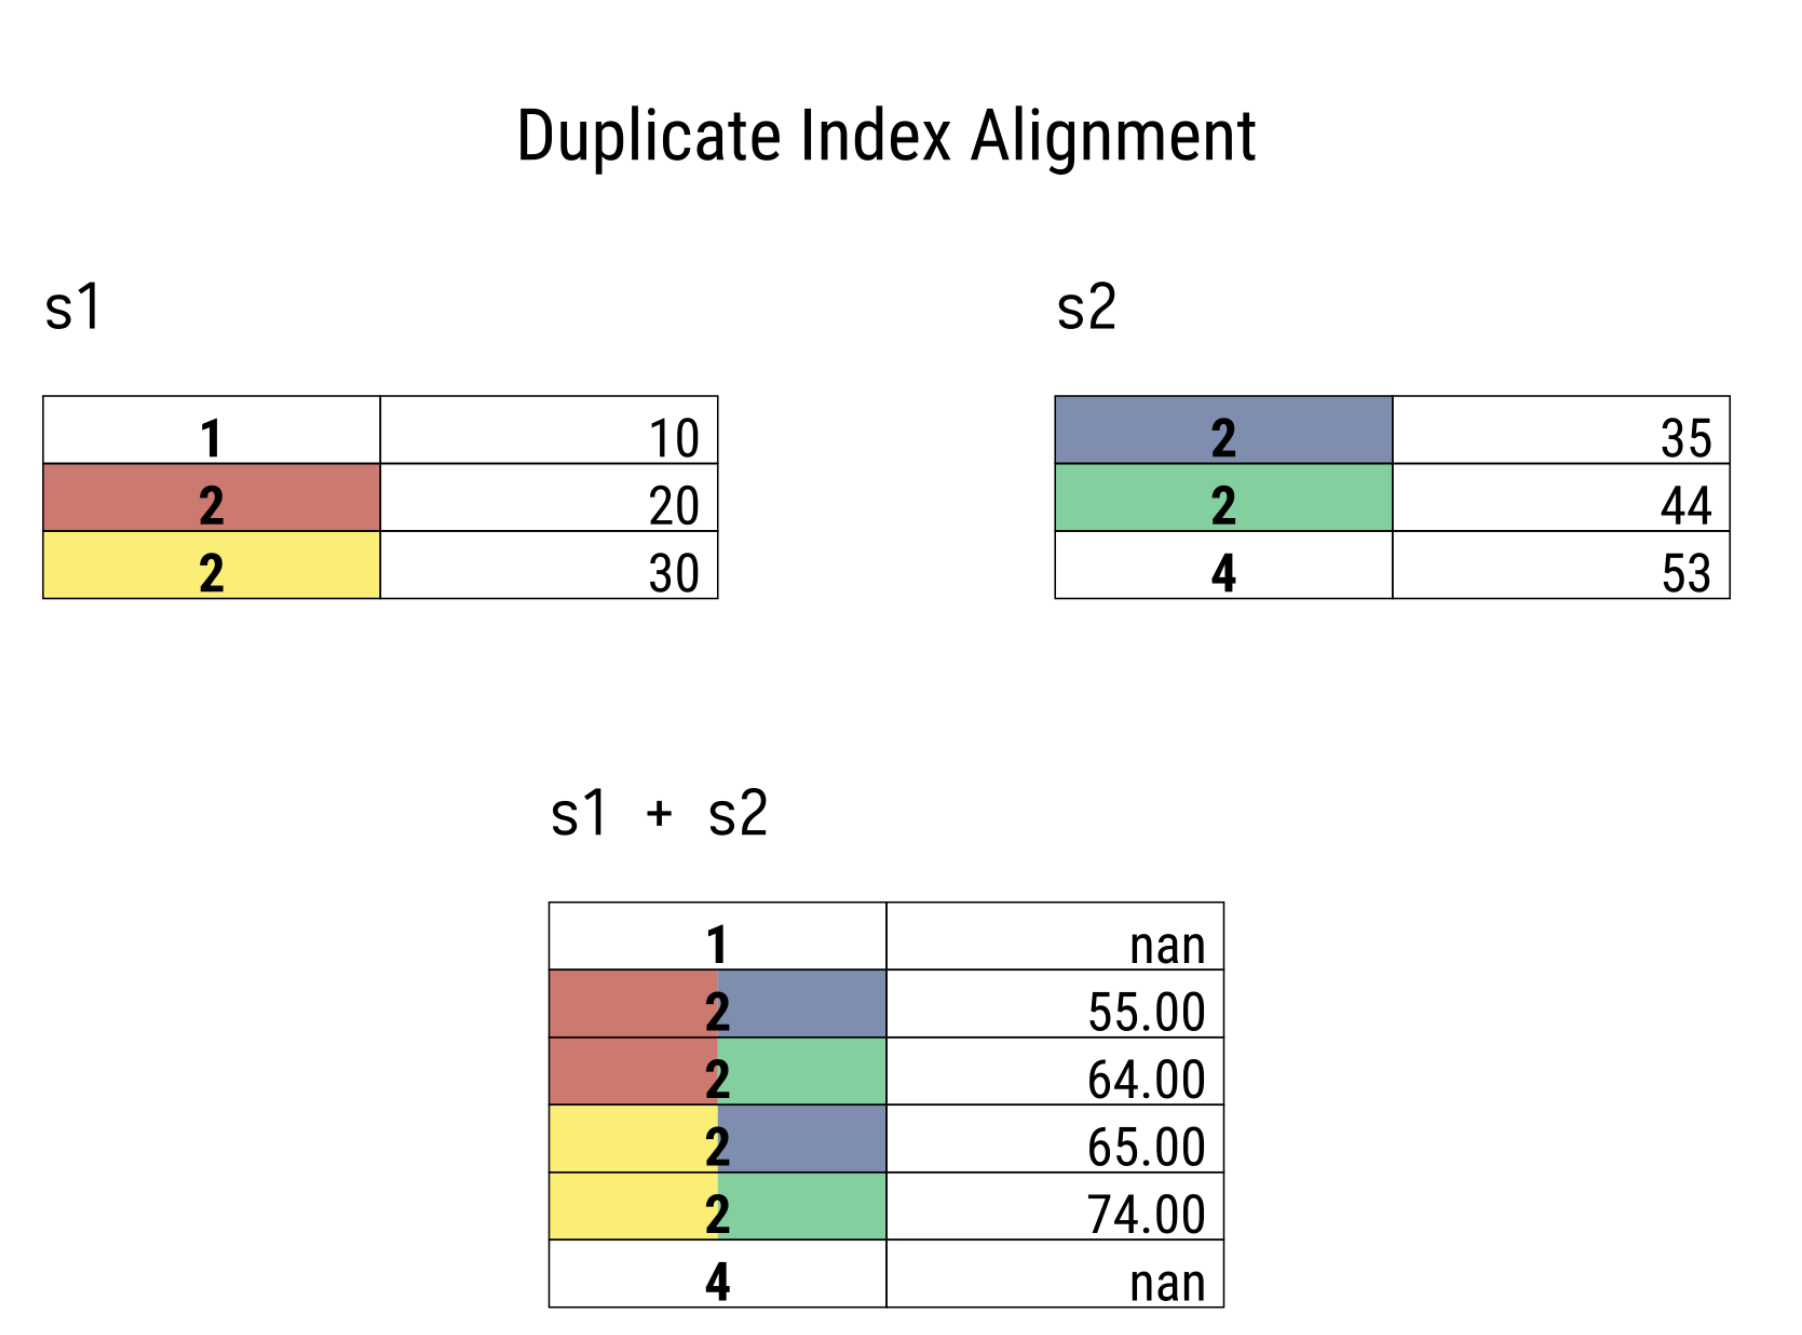

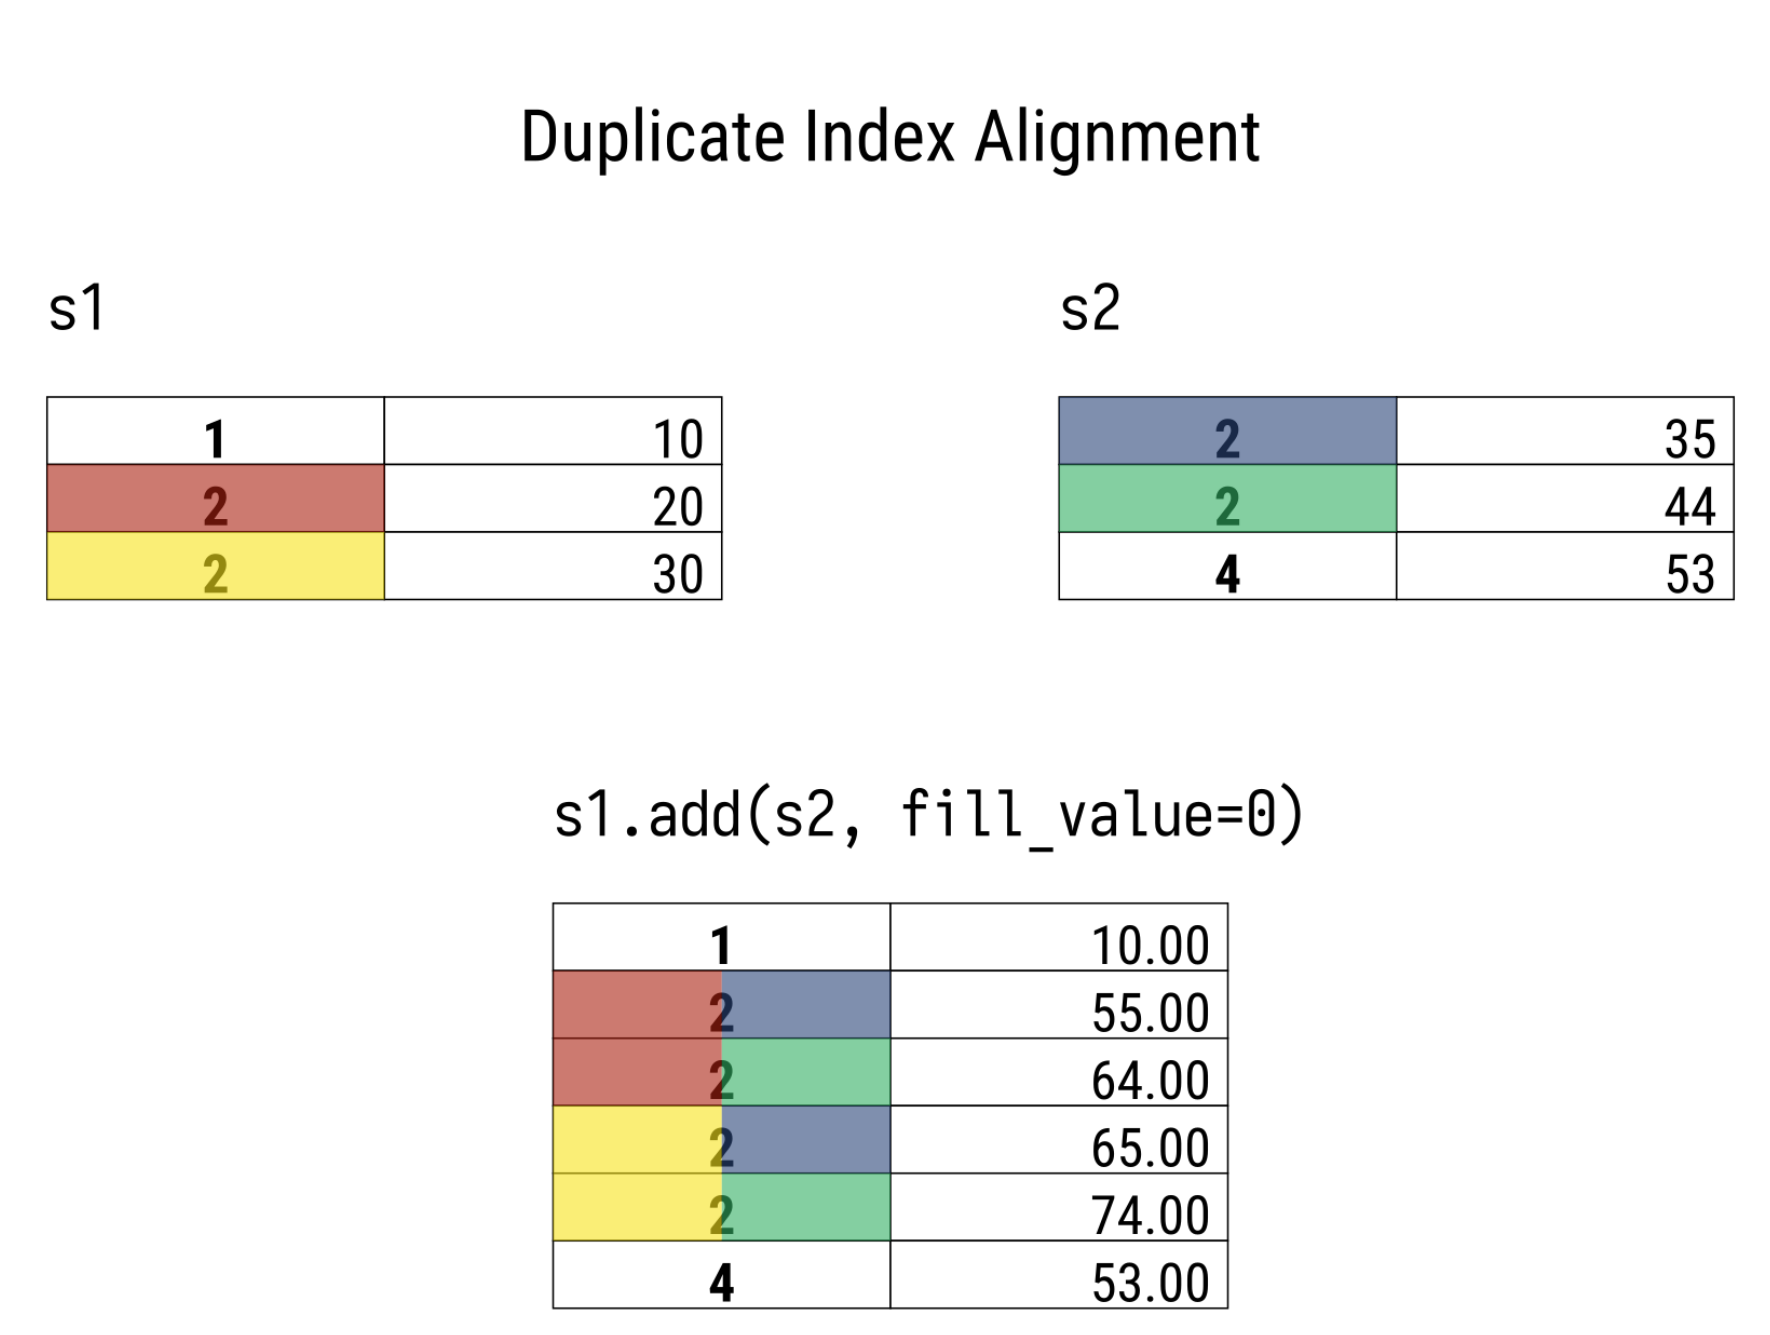

In [ ]:
#Aligning will take each index entry in the left series and match it up with every entry with the same name in the index of the right series.

s1=pd.Series([10,20,30],index=[1,2,2],name='s1')
s2=pd.Series([35,44,53],index=[2,2,4],name='s2')

In [ ]:
s2

In [ ]:
s1+s2

In [ ]:
s1.add(s2,fill_value=0)

***

 شابه في عملها العمليات العادية و لكن في حالة وجود جميع العناصر مع فهرس صحيح, لذلك وجود طرق العمليات
Operator methods تغير سلوك عملية الجمع من خلال برارمتر خاص بوضع رقم صفر للعنصر الغير موجود

Try s1+s2 and s1.add(s2) an s1.add(s2,fill_value=0) then compare the results
***

#### Operations - Chaining

In [ ]:
# Chaining makes the code easy to read and understand.prefer the method to the operator is that it makes chaining manipulations
#easier.


In [ ]:
(city_mpg+highway_mpg)/2

In [ ]:
city_mpg.add(highway_mpg).div(2)

# `Aggregate Methods`

In [ ]:
# Aggregations are the numbers that your boss wants to be reported.
#Try  
#city_mpg.sum()
#city_mpg.mean()
#city_mpg.gt(20).mean()
city_mpg.gt(20).mul(100).mean()

In [ ]:
# 1. Find the count of non-missing values of a series. city_mpg.count(level=None)
# 2. Find the number of entries of a series.           city_mpg.count()
# 3. Find the number of unique entries of a series.    city_mpg.nunique(dropna=True)
# 4. Find the mean value of a series.                  city_mpg.mean()
# 5. Find the maximum value of a series.               city_mpg.max()
city_mpg.describe() 

In [ ]:
city_mpg.min()

# `Conversion Methods`

In [ ]:
# Sometimes you will need to change the type of the data.
# formats that do not include type information OR have better performance to save significant amounts of memory.
# int64 means 8 bytes
np.iinfo('int8')

In [ ]:
# convert_dtypes() this will convert automatically but we need to explore what heppened to our data
city_mpg.astype('Int16')

In [ ]:
# Memory Usage by nbytes property or memory_usage() methode
# The value of .nbytes is just the memory that the data is using.
# The .memory_usage includes the index memory and can include the contribution from object types.
city_mpg.nbytes

In [ ]:
city_mpg.astype('Int16').memory_usage()

In [ ]:
make=data_frame.make
make

In [ ]:
make.memory_usage()

In [ ]:
make.nbytes

In [ ]:
# String and Category Types
# benefit of converting to category data type 
# في نوع البيانات الفئوي (category)، يتم تخزين مجموعة فريدة من القيم مرة واحدة، ثم يتم الربط بين القيم الفعلية والقيم المختزنة، مما يقلل من استهلاك الذاكرة.
#city_mpg.astype(str)
#city_mpg.astype('category')

In [ ]:
# convert the serie to dataframe
city_mpg.to_frame()

# `Manipulation Methods`

***
Introduction
* Have a dataset, trying to understand, clean up, and model.<br>
* Use methods that operate on a series and return a new series (usually with the same index)
***

## .apply and .where Methodes

***
* .apply is to every value.it broadcast the operation to the series<br>
* .apply method typically operates on each individual value in the series, the function is called once for every value. If you have one million values in a series, it will be called one million times.<br>
* .where method takes a boolean array to mark where a condition is true.<br>
***

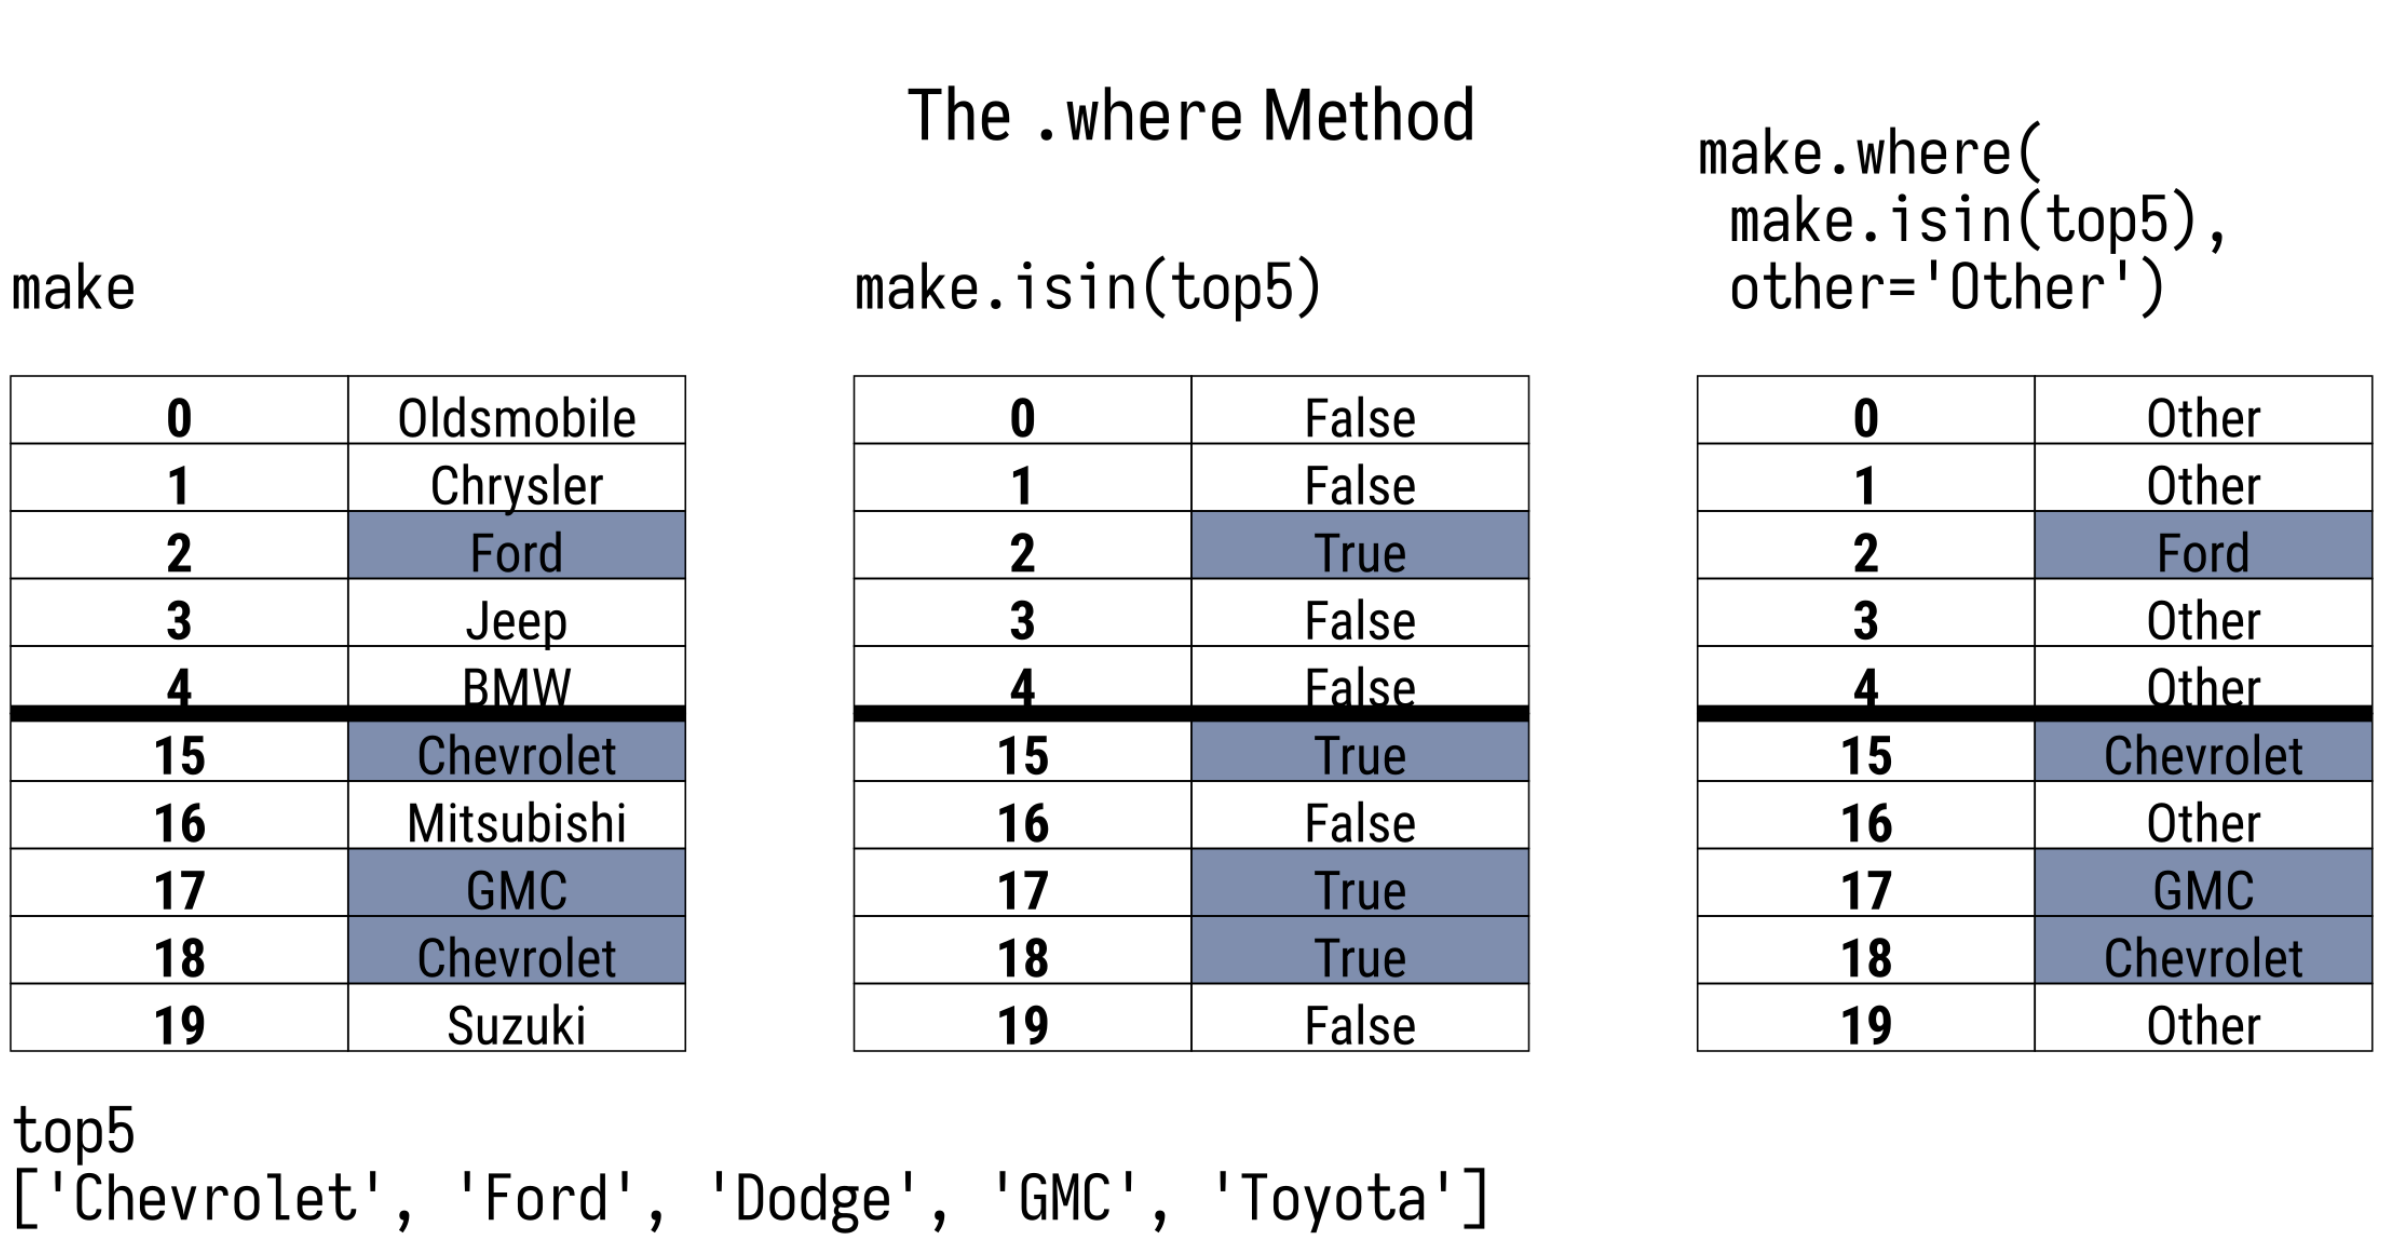

In [ ]:
# I will measure the cell time of execution
# this faster
%timeit city_mpg.gt(20)

In [ ]:
def gt20(val1):
    return val1>20
%timeit city_mpg.apply(gt20)

In [ ]:
make

In [ ]:
make.value_counts()

In [ ]:
top5=make.value_counts().index[:5]

In [ ]:
top5

In [ ]:
def generalize_top5(val):
    if val in top5:
        return val
    return 'other'

In [ ]:
# here let us try the performance
%timeit make.apply(generalize_top5)

In [ ]:
%timeit make.where(make.isin(top5),other='other')

In [ ]:
make.where(make.isin(top5),other='other')

## If Else with Pandas

In [ ]:
vc=make.value_counts()

In [ ]:
top5=vc.index[:5]
top10=vc.index[:10]

In [ ]:
top10

In [ ]:
def generalize(val):
    if val in top5:
        return val
    elif val in top10:
        return val
    else:
        return 'Other'

In [ ]:
make.apply(generalize)

In [ ]:
# here we can chain
(
make
.where(make.isin(top5),'Top10')
.where(make.isin(top10),'Other')
)

In [ ]:
make.where(make.isin(top5),'Top10')

## Missing Data

***
Many machine learning algorithms do not work if there is missing data.<br>
The cylinders column has missing values.
***

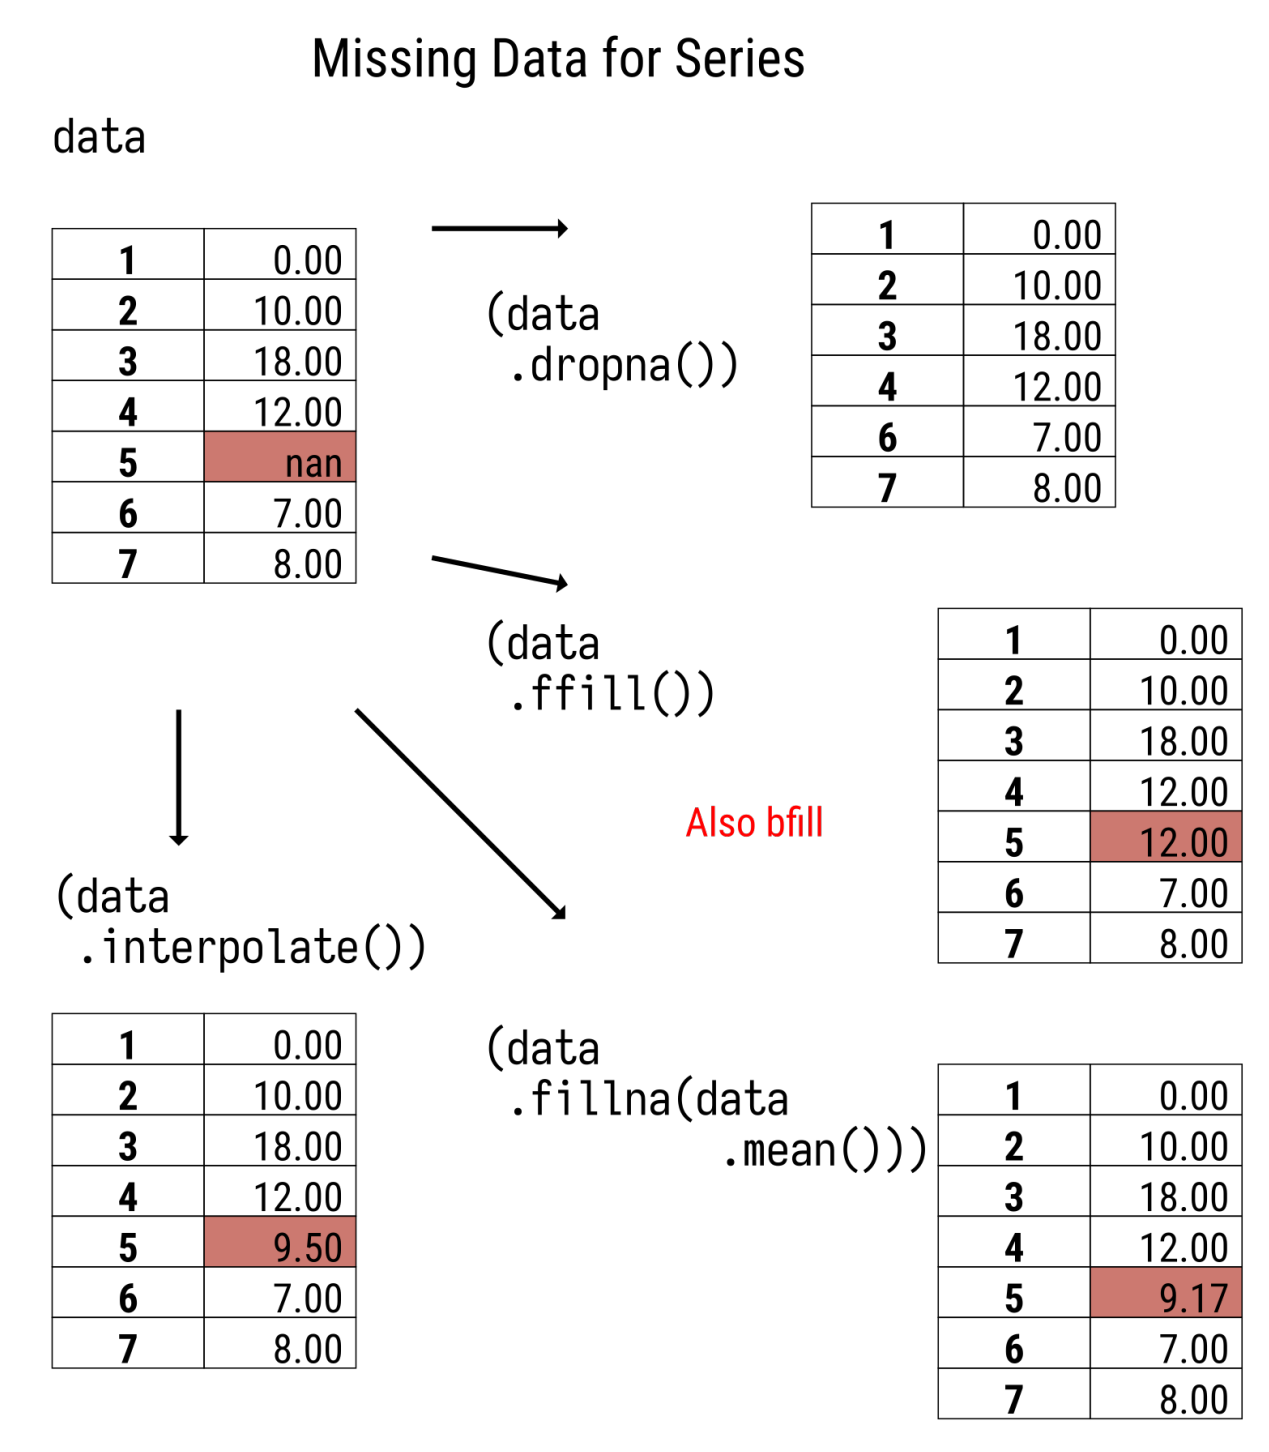

In [ ]:
series1 = pd.Series([1, 2, 3, 4], index=['A', 'B', 'C', 'D'])
series2 = pd.Series([2, 4], index=['B', 'D'])

In [ ]:
#result=series1.loc[series2]

In [ ]:
# The cylinders column has missing values.
cyl=data_frame.cylinders

In [ ]:
cyl.isna().sum()

In [ ]:
missing=cyl.isna()

In [ ]:
missing

In [ ]:
make.loc[missing]

In [ ]:
cyl

In [ ]:
# create The result of series[series.isna()] is a Series containing only the elements from the original Series where the values are NaN (Not a Number).
cyl[cyl.isna()]

In [ ]:
# fill NAN cells : series.dropna() cyl.dropna() will not delete NAN values from series, only from the result.
# Drop NAN cells : series.ffill()
cyl.dropna()

In [ ]:
cyl

In [ ]:
cyl.fillna(cyl.mean())

In [ ]:
cyl.loc[7136:7141]

In [ ]:
cyl.fillna(0).loc[7136:7141]

In [ ]:
cyl.loc[7136:7141]

In [ ]:
#  Interpolating Data, This comes in handy if the data is ordered
temp=pd.Series([32,40,None,42,39,15])

In [ ]:
temp

In [ ]:
temp.interpolate()

## Sorting Value

In [ ]:
# Sorting Value, sort_values () will rearrange the values and indexes
city_mpg.sort_values()
city_mpg.sort_values().sort_index()

## Dropping Duplicates

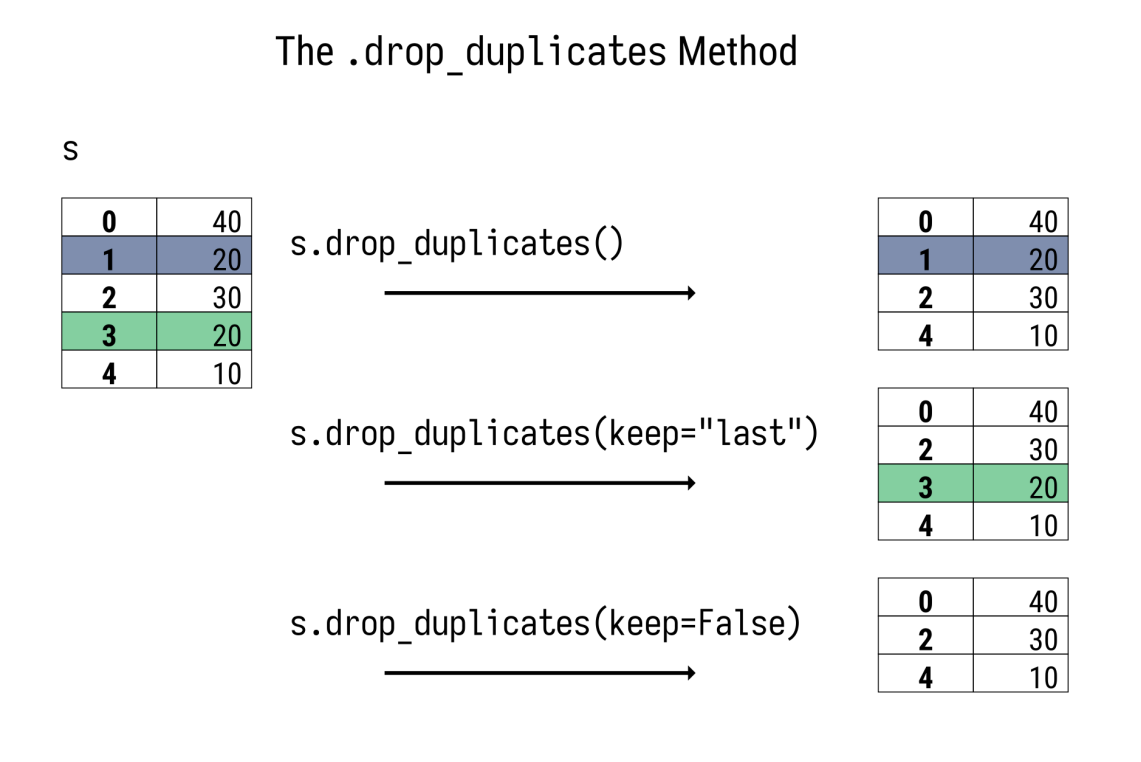

In [ ]:
#The .drop_duplicates method will return a new series that drops the values after they appear
#more than once by default. The behavior can be changed with the keep parameter.
city_mpg.drop_duplicates()

## Ranking Data

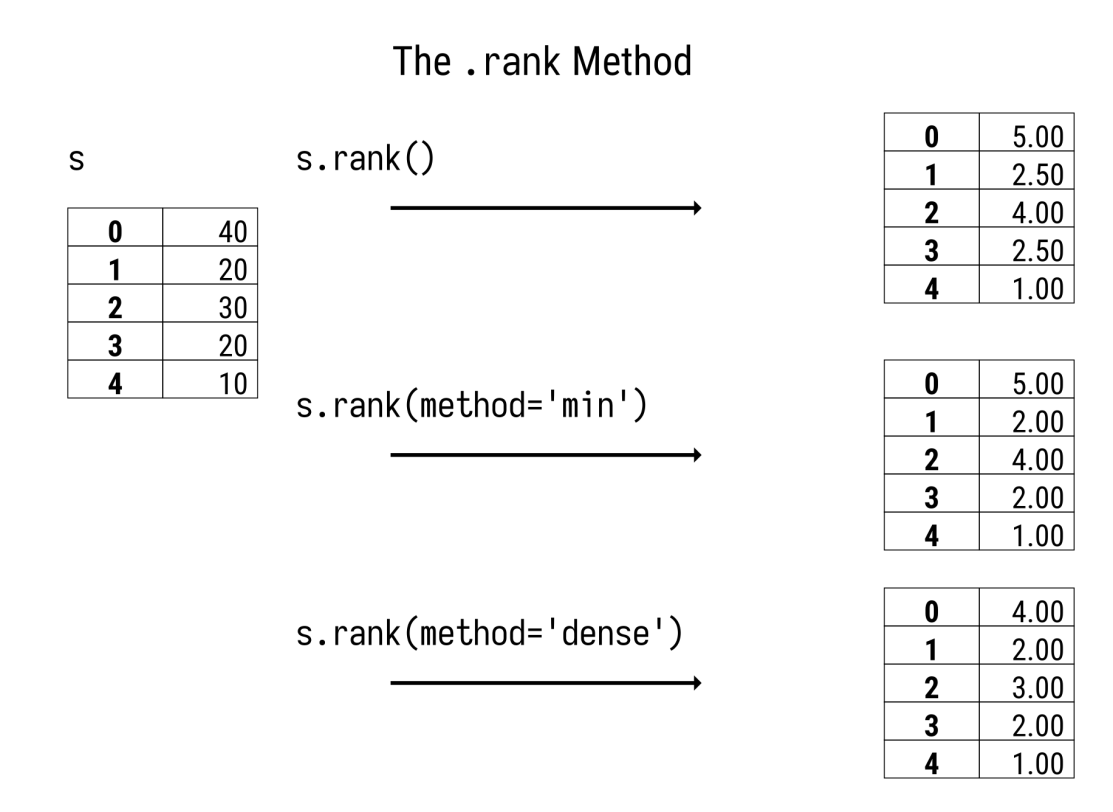

In [ ]:
# return a series that keeps the original index but uses the ranks of values from the original series.
city_mpg.rank()

## Replacing Data

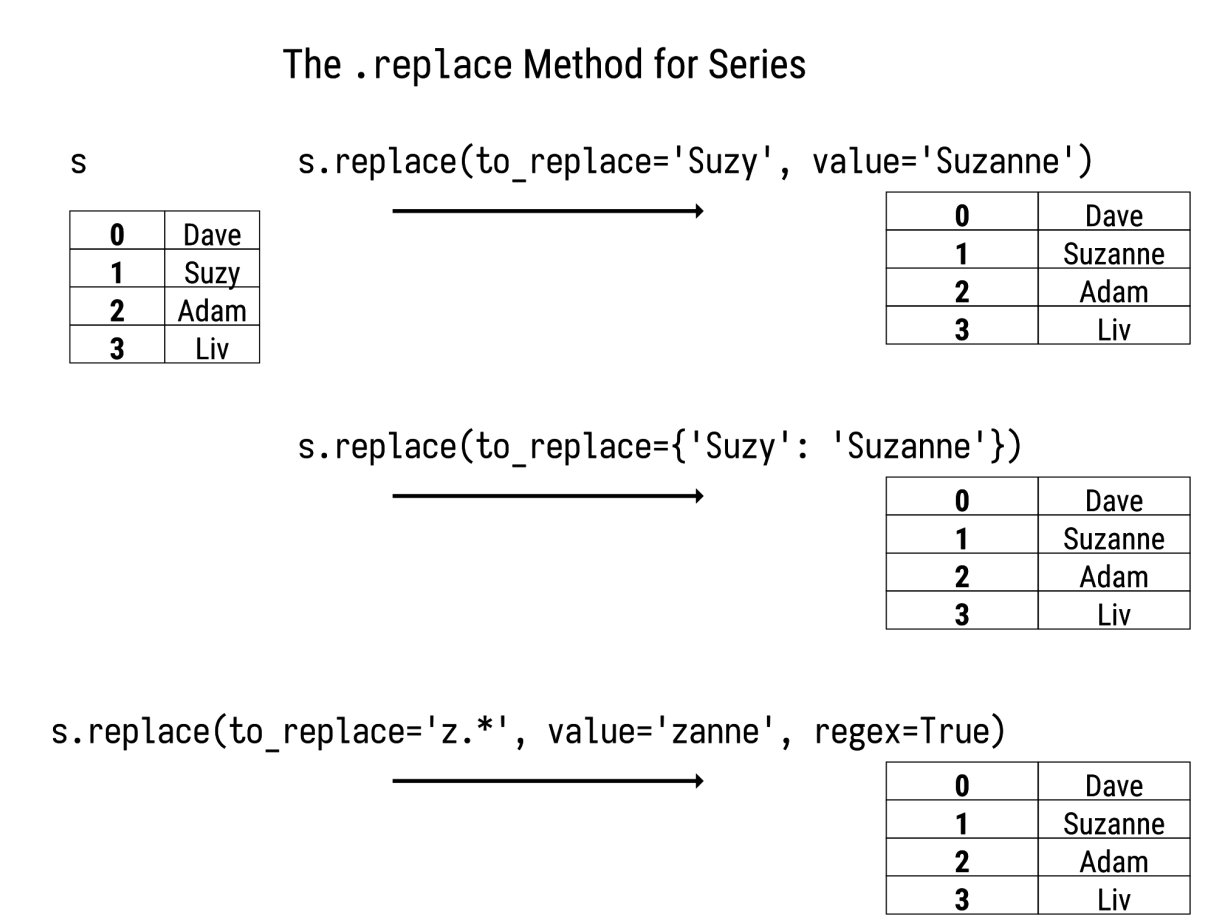

In [ ]:
# series.replace(value,value)
# series.replace(to_replace='',value='')
# series.replace(to_replace={'':''})
# series.replace(to_replace='z.*',value='zairo',regex=True)
make.replace('Subaru','スバル')

In [ ]:
name

In [ ]:
name.replace(to_replace='Suzy',value='Daisy')

In [ ]:
name

In [ ]:
name.replace(to_replace='D.*',value='Sophie',regex=True)

## Binning Data


***
Binning في Python يشير إلى عملية تقسيم مجال القيم إلى فئات (bins)، حيث يتم تجميع القيم المماثلة في نطاقات أو فئات محددة. هذا الإجراء يُستخدم لتحويل البيانات الرقمية المستمرة إلى بيانات تصنيفية.
<br>
<div style="direction:rtl"> 

الأهداف الرئيسية لل binning هي:
    
تقليل التعقيد:

يمكن أن تكون البيانات الرقمية المستمرة معقدة للفهم، وخاصةً عندما يكون لديك العديد من القيم.
عند تجميعها في فئات، يمكن أن تساعد عملية binning في تقليل التعقيد وتبسيط البيانات.

تحسين الأداء:

في بعض الحالات، يمكن أن يساعد binning في تحسين أداء النماذج الإحصائية أو الآلات الرئيسية.
بدلاً من التعامل مع قيم فردية، يمكن للنماذج أو الخوارزميات التعامل مع فئات.

تحسين التصور البصري:

قد تساعد الرسوم البيانية والتصور البصري في فهم توزيع البيانات بشكل أفضل.
بتصنيف البيانات في فئات، يمكنك إنشاء الرسوم البيانية التي تظهر التوزيع بشكل أوضح.   
</div>

***

In [ ]:
pd.cut(city_mpg,[0,10,20,40,70,150])

In [ ]:
city_mpg

In [ ]:
# If you wanted 10 bins that had approximately the same number of entries in each bin
pd.qcut(city_mpg,10)